## Exercício prático de regressão linear

Instruções: se o dataset 'datasetCarros.csv' em todos os exercícios.

In [47]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

# 1
a) Faça um modelo de regressão linear simples utilizando a variável 'KmRodado' para prever a 'PrecoVenda'.<br>

b) Calcule o R2 para o modelo criado.

In [25]:
carros_df = pd.read_csv('datasetCarros.csv', sep=',')
carros_df

,Nome,Ano,PrecoVenda,PrecoAtual,KmRodado,TipoCombustivel,Trasmissao,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Manual,0
...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Manual,0


In [26]:
X = carros_df[['KmRodado']]
y = carros_df['PrecoVenda']

In [27]:
#com sklearn

lm=LinearRegression()
lm.fit(X,y)

print(lm.intercept_,' - ',lm.coef_)

print(round(lm.intercept_,3),' - ', round(lm.coef_[0],3))

4.520343021594408  -  [3.81497479e-06]
4.52  -  0.0


In [28]:
#cálculo do R2 com sklearn
r_sq = lm.score(X, y)

print('R2:', r_sq)
print('R2 - round value:', round(r_sq, 3))

R2: 0.0008518862620293666
R2 - round value: 0.001


In [29]:
#com statsmodel

X_intercept = sm.add_constant(X) 
model = sm.OLS(y, X_intercept).fit()
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             PrecoVenda   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2549
Date:                Tue, 16 Nov 2021   Prob (F-statistic):              0.614
Time:                        18:12:01   Log-Likelihood:                -915.86
No. Observations:                 301   AIC:                             1836.
Df Residuals:                     299   BIC:                             1843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5203      0.405     11.163      0.0

# 2
a) Separe o dataset em teste (5%) e treino (95%). Use o método 'train_test_split' do sklearn; configure o parâmetro random_state=10. <br>

b) Treine um modelo de regressão linear múltipla no dataset de treino utilizando todas as variáveis (exceto 'Nome') para prever a 'PrecoVenda' e exiba os coeficientes do modelo.<br>

c) Avalie o modelo encontrado utilizando o dataset de teste. Calcule o R2 e MSE.

In [30]:
carros_df['TipoCombustivel'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [31]:
carros_df['Trasmissao'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [32]:
carrosNew_df = carros_df.copy()
carrosNew_df

,Nome,Ano,PrecoVenda,PrecoAtual,KmRodado,TipoCombustivel,Trasmissao,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Manual,0
...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Manual,0


In [33]:
carrosNew_df['Trasmissao'] = carrosNew_df['Trasmissao'].astype('category') 
carrosNew_df['TipoCombustivel'] = carrosNew_df['TipoCombustivel'].astype('category')

In [34]:
carrosNew_df['Trasmissao'] = carrosNew_df['Trasmissao'].cat.codes
carrosNew_df['TipoCombustivel'] = carrosNew_df['TipoCombustivel'].cat.codes
carrosNew_df

,Nome,Ano,PrecoVenda,PrecoAtual,KmRodado,TipoCombustivel,Trasmissao,Owner
0,ritz,2014,3.35,5.59,27000,2,1,0
1,sx4,2013,4.75,9.54,43000,1,1,0
2,ciaz,2017,7.25,9.85,6900,2,1,0
3,wagon r,2011,2.85,4.15,5200,2,1,0
4,swift,2014,4.60,6.87,42450,1,1,0
...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,1,0
297,brio,2015,4.00,5.90,60000,2,1,0
298,city,2009,3.35,11.00,87934,2,1,0
299,city,2017,11.50,12.50,9000,1,1,0


In [35]:
carrosNew_df.drop('Nome', axis='columns', inplace=True)
carrosNew_df

,Ano,PrecoVenda,PrecoAtual,KmRodado,TipoCombustivel,Trasmissao,Owner
0,2014,3.35,5.59,27000,2,1,0
1,2013,4.75,9.54,43000,1,1,0
2,2017,7.25,9.85,6900,2,1,0
3,2011,2.85,4.15,5200,2,1,0
4,2014,4.60,6.87,42450,1,1,0
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,1,0
297,2015,4.00,5.90,60000,2,1,0
298,2009,3.35,11.00,87934,2,1,0
299,2017,11.50,12.50,9000,1,1,0


In [36]:
carrosNew_df.columns

Index(['Ano', 'PrecoVenda', 'PrecoAtual', 'KmRodado', 'TipoCombustivel',
       'Trasmissao', 'Owner'],
      dtype='object')

In [37]:
X = carrosNew_df[['Ano', 'PrecoAtual', 'KmRodado', 'TipoCombustivel',
       'Trasmissao', 'Owner']]
y = carrosNew_df['PrecoVenda']

In [38]:
X.corr()

,Ano,PrecoAtual,KmRodado,TipoCombustivel,Trasmissao,Owner
Ano,1.000000,-0.092304,-0.524342,-0.053643,0.000394,-0.182104
PrecoAtual,-0.092304,1.000000,-0.007744,0.037515,0.029050,-0.024398
KmRodado,-0.524342,-0.007744,1.000000,-0.166801,-0.162510,0.089216
TipoCombustivel,-0.053643,0.037515,-0.166801,1.000000,0.080466,0.055705
Trasmissao,0.000394,0.029050,-0.162510,0.080466,1.000000,-0.050316
Owner,-0.182104,-0.024398,0.089216,0.055705,-0.050316,1.000000


In [39]:
#Utilizando o sklearn

lm=LinearRegression()
lm.fit(X,y)

print(lm.intercept_,lm.coef_)

-719.9206975127279 [ 3.66909966e-01 -2.34722687e-04  1.40878835e-06 -5.57940865e+00
 -4.93018022e+00 -8.60647022e-01]


In [40]:
#cálculo de R2 com sklearn
r_sq = lm.score(X, y)

print('R2:', r_sq)
print('R2 - round value:', round(r_sq, 3))

R2: 0.4127820381997316
R2 - round value: 0.413


In [41]:
#Usando o statsmodels
#Essa linha adiciona o intercept (isso vai representar o valor das vendas quando todos os investimentos são 0)
X_intercept = sm.add_constant(X) 
model = sm.OLS(y, X_intercept).fit()
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             PrecoVenda   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     34.44
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.98e-31
Time:                        18:12:02   Log-Likelihood:                -835.86
No. Observations:                 301   AIC:                             1686.
Df Residuals:                     294   BIC:                             1712.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -719.9207    193.162     

In [42]:
#utilizando o train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=10)

In [43]:
# Cria um objeto de regressão linear 
regr = LinearRegression()

# Treina o modelo usando o conjunto de treino
regr.fit(X_train, y_train)

# Faz predições usando o conjunto de teste 
y_pred = regr.predict(X_test)


In [44]:
# Coeficientes
print("Coeficientes:", regr.coef_)

# Mean squared error (MSE)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# O coeficiente de determinação (ou R2)
print("R2 (ou coeficiente de determinação): %.2f" % r2_score(y_test, y_pred))

Coeficientes: [ 3.82457823e-01 -2.86702234e-04  1.64623728e-06 -5.58625742e+00
 -4.73812925e+00 -8.51402501e-01]
Mean squared error: 8.38
R2 (ou coeficiente de determinação): 0.64


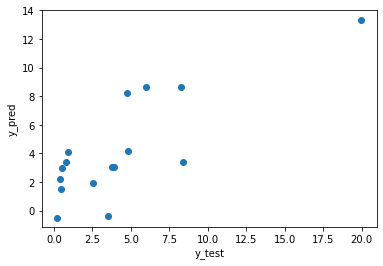

In [45]:
#scatter plot
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

Conclusão:


O modelo não conseguiu predizer de maneira satisfatória os dados de teste

**Aplicando a normalização**




In [46]:
carrosNorm_df = carrosNew_df.copy()
carrosNorm_df.head(3)

,Ano,PrecoVenda,PrecoAtual,KmRodado,TipoCombustivel,Trasmissao,Owner
0,2014,3.35,5.59,27000,2,1,0
1,2013,4.75,9.54,43000,1,1,0
2,2017,7.25,9.85,6900,2,1,0


In [48]:
carrosNorm_df.columns

Index(['Ano', 'PrecoVenda', 'PrecoAtual', 'KmRodado', 'TipoCombustivel',
       'Trasmissao', 'Owner'],
      dtype='object')

In [49]:
std_scaler = preprocessing.StandardScaler()

dfAllFeatures_norm = std_scaler.fit_transform(carrosNorm_df)

dfStandScaler = pd.DataFrame(dfAllFeatures_norm, columns = ['Ano', 'PrecoVenda', 'PrecoAtual', 'KmRodado', 'TipoCombustivel', 'Trasmissao', 'Owner'])

dfStandScaler

,Ano,PrecoVenda,PrecoAtual,KmRodado,TipoCombustivel,Trasmissao,Owner
0,0.128897,-0.258416,-0.161750,-0.256224,0.500183,0.39148,-0.174501
1,-0.217514,0.017481,-0.126194,0.155911,-1.852241,0.39148,-0.174501
2,1.168129,0.510154,-0.123404,-0.773969,0.500183,0.39148,-0.174501
3,-0.910335,-0.356950,-0.174712,-0.817758,0.500183,0.39148,-0.174501
4,0.128897,-0.012079,-0.150228,0.141743,-1.852241,0.39148,-0.174501
...,...,...,...,...,...,...,...
296,0.821718,0.953559,-0.107651,-0.076225,-1.852241,0.39148,-0.174501
297,0.475308,-0.130321,-0.158959,0.593804,0.500183,0.39148,-0.174501
298,-1.603156,-0.258416,-0.113052,1.313340,0.500183,0.39148,-0.174501
299,1.168129,1.347698,-0.099550,-0.719876,-1.852241,0.39148,-0.174501


In [50]:
X = dfStandScaler[['Ano', 'PrecoAtual', 'KmRodado', 'TipoCombustivel', 'Trasmissao', 'Owner']]
y = dfStandScaler['PrecoVenda']

In [51]:
#utilizando o train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=10)

In [52]:
# Cria um objeto de regressão linear 
regr = LinearRegression()

# Treina o modelo usando o conjunto de treino
regr.fit(X_train, y_train)

# Faz predições usando o conjunto de teste 
y_pred = regr.predict(X_test)

In [53]:
# Coeficientes
print("Coeficientes:", regr.coef_)

# Mean squared error (MSE)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# O coeficiente de determinação (ou R2)
print("R2 (ou coeficiente de determinação): %.2f" % r2_score(y_test, y_pred))

Coeficientes: [ 0.21757594 -0.00627682  0.01259481 -0.46797637 -0.31696351 -0.04152728]
Mean squared error: 0.33
R2 (ou coeficiente de determinação): 0.64


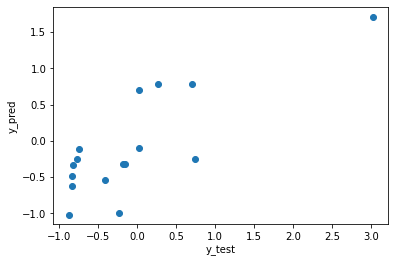

In [54]:
#scatter plot
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

Mesmo usando a normalização, os dados preditivos não batem com os dados de teste.